# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Lecture 3 </center>

# <center>Feature Engineering</center>

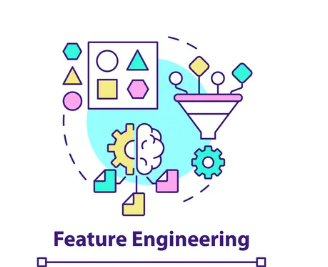

# 1. Imputing Categorical Features using sklearn

Instructions:

- Load data from loan_train.csv file. Explore to discover missing values if any.


- Use sklearn SimpleImputer to Impute the missing values with most_frequent value.



In [28]:
import pandas as pd
df = pd.read_csv('loan_train.csv')
df.head()

# import pandas as pd
# df = pd.read_csv("loan_train.csv")
# # df.head()
# df

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [18]:
# df.isna()

In [19]:
# df.isna().sum()

In [33]:
df.drop(['Loan_ID'],  axis= 1, inplace=True)
df.head()





# df.drop(['Loan_ID'], axis = 1, inplace= True)
# df.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [34]:
# df.drop(subset = ['Loan_ID'], keep='first').sum()
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [35]:
from sklearn.impute import SimpleImputer
imputeN = SimpleImputer()
# ndata= imputeN.fit_transform(ndf)
# ndata

In [36]:
cdf = df.select_dtypes(include = ['object'])
cdf.head()

Gender Married Dependents     Education Self_Employed Property_Area  \
0   Male      No          0      Graduate            No         Urban   
1   Male     Yes          1      Graduate            No         Rural   
2   Male     Yes          0      Graduate           Yes         Urban   
3   Male     Yes          0  Not Graduate            No         Urban   
4   Male      No          0      Graduate            No         Urban   

  Loan_Status  
0           Y  
1           N  
2           Y  
3           Y  
4           Y

In [37]:
cdf.isna().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [38]:
from sklearn.impute import SimpleImputer
imputeC = SimpleImputer(strategy="most_frequent")
ndata = imputeC.fit_transform(cdf)
ndata

array([['Male', 'No', '0', ..., 'No', 'Urban', 'Y'],
       ['Male', 'Yes', '1', ..., 'No', 'Rural', 'N'],
       ['Male', 'Yes', '0', ..., 'Yes', 'Urban', 'Y'],
       ...,
       ['Male', 'Yes', '1', ..., 'No', 'Urban', 'Y'],
       ['Male', 'Yes', '2', ..., 'No', 'Urban', 'Y'],
       ['Female', 'No', '0', ..., 'Yes', 'Semiurban', 'N']], dtype=object)

In [40]:
#
# import numpy as np
# np.isnan(ndata)
cdff = pd.DataFrame(ndata,columns = cdf.columns) 
cdff.head()

Gender Married Dependents     Education Self_Employed Property_Area  \
0   Male      No          0      Graduate            No         Urban   
1   Male     Yes          1      Graduate            No         Rural   
2   Male     Yes          0      Graduate           Yes         Urban   
3   Male     Yes          0  Not Graduate            No         Urban   
4   Male      No          0      Graduate            No         Urban   

  Loan_Status  
0           Y  
1           N  
2           Y  
3           Y  
4           Y

In [41]:
cdff.isna().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

# 2. Encoding Categorical Features

### 2.1. Encoding Nominal Features

Instructions:

- Explore data and discover nominal features.


- Use one-hot encoding technique to encode nominal features.

In [42]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
result = ohe.fit_transform(cdff[['Gender', 'Married', 'Self_Employed']]).toarray()
result

array([[0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1.],
       ...,
       [0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 1., 0.],
       [1., 0., 1., 0., 0., 1.]])

In [43]:
ohe.get_feature_names_out()


array(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Self_Employed_No', 'Self_Employed_Yes'], dtype=object)

In [53]:
# nodf = pd.DataFrame(result, columns = cdf.columns )
# nodf.head()

### 2.2. Encoding Ordinal Features

Instructions:

- Explore data and discover all ordinal features


- Use OrdinalEncoder to encode ordinal Features

In [27]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
result = oe.fit_transform(cdff[['Education', 'Property_Area']])
result

array([[0., 2.],
       [0., 0.],
       [0., 2.],
       ...,
       [0., 2.],
       [0., 2.],
       [0., 1.]])

In [4]:
# nodf = pd.DataFrame(result, columns = cols)
# nodf.head()

### 2.3. Label Encoder

Instructions:

- Use LabelEncoder to encode target feature.


- Analyze the difference between Ordinal Encoder and Label Encoder

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
result = le.fit_transform(cdff.Loan_Status)
result

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [33]:
# df_all = pd.concat([oe, le], axis = 0)
# df_all.shape

In [8]:
# import pandas as pd
# import seaborn as sns

In [1]:
# taxis = sns.load_dataset('taxis')
# taxis

In [2]:
# taxis.dtypes

In [3]:
# ndf1= taxis.select_dtypes(include ='number')
# ndf1

In [4]:
# ndf1.isna()

In [5]:
# df = pd.Dataframe(taxis.data, columns= taxis.feature_names)
# df
# df = pd.DataFrame(taxis.data, columns=iris.feature_names)
# df['target'] = taxis.target
# df